In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_excel("Amazon reviews data set.xlsx")

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.iloc[:,1]=lb.fit_transform(df.iloc[:,1])
df

,Cus_ID,Sex,Age,Income,Rating
0,301219,1,23,306555,44
1,301220,0,26,306555,91
2,301221,0,24,326992,7
3,301222,1,28,326992,87
4,301223,0,38,347429,45
...,...,...,...,...,...
195,301414,0,42,2452440,89
196,301415,0,54,2575062,32
197,301416,1,39,2575062,83
198,301417,1,39,2799869,21


In [102]:
#clustering using income 
x=df.iloc[0:,3:5].values
x

array([[ 306555,      44],
       [ 306555,      91],
       [ 326992,       7],
       [ 326992,      87],
       [ 347429,      45],
       [ 347429,      86],
       [ 367866,       7],
       [ 367866,     106],
       [ 388303,       4],
       [ 388303,      81],
       [ 388303,      16],
       [ 388303,     111],
       [ 408740,      17],
       [ 408740,      87],
       [ 408740,      15],
       [ 408740,      89],
       [ 429177,      40],
       [ 429177,      74],
       [ 470051,      33],
       [ 470051,     110],
       [ 490488,      40],
       [ 490488,      82],
       [ 510925,       6],
       [ 510925,      82],
       [ 572236,      16],
       [ 572236,      92],
       [ 572236,      36],
       [ 572236,      69],
       [ 592673,      35],
       [ 592673,      98],
       [ 613110,       5],
       [ 613110,      82],
       [ 674421,       5],
       [ 674421,     104],
       [ 674421,      16],
       [ 674421,      91],
       [ 694858,      20],
 

In [103]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


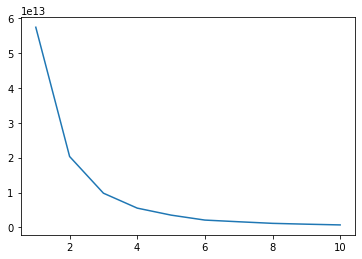

In [104]:
plt.plot(range(1,11),wcss)

In [105]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=21)
y_means=kmeans.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Text(0, 0.5, 'rating')

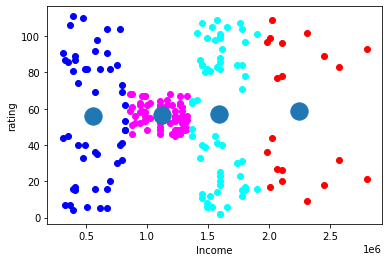

In [106]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='magenta')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='b')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='r')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='cyan')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)

plt.xlabel("Income")
plt.ylabel("rating")

In [107]:
#clustering using age 
y=df.iloc[0:,4].values.reshape(-1,1)
z=df.iloc[0:,2].values.reshape(-1,1)
x=np.concatenate([y,z],axis=1)
x

array([[ 44,  23],
       [ 91,  26],
       [  7,  24],
       [ 87,  28],
       [ 45,  38],
       [ 86,  27],
       [  7,  42],
       [106,  28],
       [  4,  77],
       [ 81,  36],
       [ 16,  81],
       [111,  42],
       [ 17,  70],
       [ 87,  29],
       [ 15,  45],
       [ 89,  27],
       [ 40,  42],
       [ 74,  24],
       [ 33,  63],
       [110,  42],
       [ 40,  42],
       [ 82,  30],
       [  6,  56],
       [ 82,  38],
       [ 16,  65],
       [ 92,  35],
       [ 36,  54],
       [ 69,  42],
       [ 35,  48],
       [ 98,  28],
       [  5,  72],
       [ 82,  26],
       [  5,  64],
       [104,  22],
       [ 16,  59],
       [ 91,  26],
       [ 20,  51],
       [ 82,  36],
       [ 30,  44],
       [ 84,  24],
       [ 40,  78],
       [104,  29],
       [ 41,  58],
       [ 69,  38],
       [ 32,  59],
       [ 73,  29],
       [ 62,  60],
       [ 53,  33],
       [ 48,  35],
       [ 48,  38],
       [ 59,  59],
       [ 68,  40],
       [ 61,

In [108]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=21)
y_means=kmeans.fit_predict(x)
y_means

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0, 0.5, 'rating')

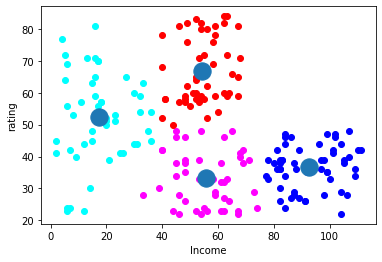

In [110]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='magenta',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='b',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='r',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='cyan',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)
plt.xlabel("Income")
plt.ylabel("rating")

In [111]:
kmeans.cluster_centers_[:,:]

array([[55.7826087 , 33.17391304],
       [92.66666667, 36.57894737],
       [54.32653061, 66.83673469],
       [17.3125    , 52.3125    ]])

In [112]:
# clustering using sex 
y=df.iloc[0:,4].values.reshape(-1,1)
z=df.iloc[0:,1].values.reshape(-1,1)
x=np.concatenate([y,z],axis=1)
x

array([[ 44,   1],
       [ 91,   0],
       [  7,   0],
       [ 87,   1],
       [ 45,   0],
       [ 86,   0],
       [  7,   0],
       [106,   0],
       [  4,   1],
       [ 81,   0],
       [ 16,   1],
       [111,   0],
       [ 17,   0],
       [ 87,   0],
       [ 15,   1],
       [ 89,   1],
       [ 40,   0],
       [ 74,   1],
       [ 33,   1],
       [110,   0],
       [ 40,   1],
       [ 82,   1],
       [  6,   0],
       [ 82,   1],
       [ 16,   0],
       [ 92,   1],
       [ 36,   0],
       [ 69,   1],
       [ 35,   0],
       [ 98,   0],
       [  5,   1],
       [ 82,   0],
       [  5,   1],
       [104,   1],
       [ 16,   0],
       [ 91,   0],
       [ 20,   0],
       [ 82,   0],
       [ 30,   0],
       [ 84,   0],
       [ 40,   0],
       [104,   1],
       [ 41,   1],
       [ 69,   0],
       [ 32,   0],
       [ 73,   0],
       [ 62,   0],
       [ 53,   0],
       [ 48,   0],
       [ 48,   0],
       [ 59,   0],
       [ 68,   1],
       [ 61,

In [113]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


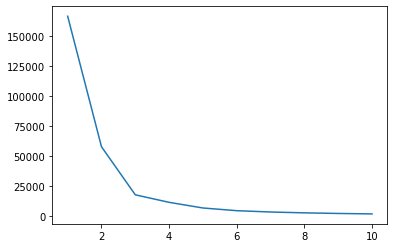

In [114]:
plt.plot(range(1,11),wcss)

In [115]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=21)
y_means=kmeans.fit_predict(x)
y_means

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Text(0, 0.5, 'rating')

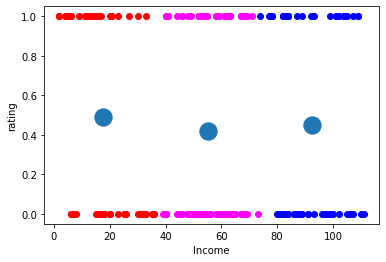

In [116]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='magenta',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='b',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='r',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='cyan',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)
plt.xlabel("Income")
plt.ylabel("rating")